In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib 
from scipy.stats import t
import plotly.graph_objects as go
import seaborn as sb
from matplotlib.ticker import MultipleLocator
import os
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor


In [2]:
# we import the training data set in order to make the imputations
training_data = pd.read_csv(r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\2nd Trimester\Analytics Practum 1\assigment_2022_2\Data and files\training.csv")

# We remove character values:
training_data = training_data.drop('Country', axis=1)
training_data = training_data.drop('Region', axis=1)
training_data = training_data.drop('Work_rightCIRI_2011', axis=1)

training_data

,Data_year,KOF_Globalis,Work_rightCIRI,Trade_open,FDI,VDEM_Libdem,GDPpc_2016,Armedcon,Asia,Subsah_Africa,...,Pol_right_F_2011,Indep_judic_2011,Rape_prev_2018,Rape_report_2015,Rape_enclave_2015,Rape_compl_2018,Phys_secF_2014,Phys_secF_2019,Gender_equal_2015,Hum_traff_2019
0,2018,38.57,1,55.92,0.48,0.24,570,1,1,0,...,2,0,4.0,4.0,2.0,17.0,4.0,4.0,2.0,3.0
1,2018,63.02,1,26.12,0.59,0.61,11970,0,0,0,...,3,1,1.0,4.0,0.0,9.0,3.0,2.0,4.0,1.0
2,2018,67.09,1,75.92,3.21,0.23,3770,0,0,0,...,2,0,0.0,3.0,0.0,9.0,4.0,3.0,0.0,3.0
3,2016,45.54,0,37.95,1.05,0.16,1330,1,1,0,...,2,0,1.0,4.0,1.0,12.0,4.0,4.0,4.0,3.0
4,2016,57.74,1,56.40,1.54,0.40,3070,0,0,0,...,3,0,3.0,3.0,0.0,10.0,3.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2018,64.86,1,91.44,1.48,0.66,3690,0,0,0,...,2,0,4.0,4.0,2.0,15.0,3.0,4.0,4.0,2.0
66,2018,52.66,0,47.22,2.60,0.28,630,1,0,1,...,3,1,1.0,3.0,2.0,12.0,3.0,3.0,3.0,2.0
67,2018,70.60,0,104.81,3.69,0.22,2310,1,0,0,...,2,0,1.0,3.0,2.0,12.0,3.0,4.0,0.0,2.0
68,2016,64.27,0,184.69,6.14,0.20,2100,0,1,0,...,2,0,NaN,2.0,0.0,NaN,3.0,3.0,2.0,3.0


# Q1: Data Preprocessing

In [3]:
from sklearn.experimental import enable_iterative_imputer
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import IterativeImputer


# We set the Regressor Tree and the max depth
regressor = DecisionTreeRegressor(max_depth=5)
imputer = IterativeImputer(estimator=regressor, max_iter=1 )

# We impute the missing values
training_imputed = imputer.fit_transform(training_data)

# We conert the array back to pandas data frame
training_imputed = pd.DataFrame(training_imputed, columns=training_data.columns)

training_imputed

C:\Users\vlass\AppData\Roaming\Python\Python39\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Data_year,KOF_Globalis,Work_rightCIRI,Trade_open,FDI,VDEM_Libdem,GDPpc_2016,Armedcon,Asia,Subsah_Africa,...,Pol_right_F_2011,Indep_judic_2011,Rape_prev_2018,Rape_report_2015,Rape_enclave_2015,Rape_compl_2018,Phys_secF_2014,Phys_secF_2019,Gender_equal_2015,Hum_traff_2019
0,2018.0,38.57,1.0,55.92,0.48,0.24,570.0,1.0,1.0,0.0,...,2.0,0.0,4.000000,4.0,2.0,17.0,4.0,4.0,2.0,3.0
1,2018.0,63.02,1.0,26.12,0.59,0.61,11970.0,0.0,0.0,0.0,...,3.0,1.0,1.000000,4.0,0.0,9.0,3.0,2.0,4.0,1.0
2,2018.0,67.09,1.0,75.92,3.21,0.23,3770.0,0.0,0.0,0.0,...,2.0,0.0,0.000000,3.0,0.0,9.0,4.0,3.0,0.0,3.0
3,2016.0,45.54,0.0,37.95,1.05,0.16,1330.0,1.0,1.0,0.0,...,2.0,0.0,1.000000,4.0,1.0,12.0,4.0,4.0,4.0,3.0
4,2016.0,57.74,1.0,56.40,1.54,0.40,3070.0,0.0,0.0,0.0,...,3.0,0.0,3.000000,3.0,0.0,10.0,3.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2018.0,64.86,1.0,91.44,1.48,0.66,3690.0,0.0,0.0,0.0,...,2.0,0.0,4.000000,4.0,2.0,15.0,3.0,4.0,4.0,2.0
66,2018.0,52.66,0.0,47.22,2.60,0.28,630.0,1.0,0.0,1.0,...,3.0,1.0,1.000000,3.0,2.0,12.0,3.0,3.0,3.0,2.0
67,2018.0,70.60,0.0,104.81,3.69,0.22,2310.0,1.0,0.0,0.0,...,2.0,0.0,1.000000,3.0,2.0,12.0,3.0,4.0,0.0,2.0
68,2016.0,64.27,0.0,184.69,6.14,0.20,2100.0,0.0,1.0,0.0,...,2.0,0.0,0.933333,2.0,0.0,11.0,3.0,3.0,2.0,3.0


# Q2: Slavery Estimation Using All Features

## We begin by splitting the data frame into two parts:
### One with the 2016 data
### One with the 2018 data 

In [4]:
# We change the data type of year to integer.
training_imputed['Data_year'] = training_imputed['Data_year'].astype(int)

# we find the columns for 2016
col_2016=training_imputed.filter(regex=('[1-6]$')).columns.tolist()

# we find the columns for 2018
col_2018 = training_imputed.filter(regex=('[8-9]$')).columns.tolist()


In [5]:
# We take the data for 2016:
training_2016 = training_imputed[training_imputed['Data_year'] == 2016]
training_2016 = training_2016.reset_index()
training_2016 = training_2016.drop('index', axis=1)
training_2016 = training_2016.drop(col_2018, axis=1)


# We take the data for 2018:
training_2018 = training_imputed[training_imputed['Data_year'] == 2018]
training_2018 = training_2018.reset_index()
training_2018 = training_2018.drop('index', axis=1)
training_2018 = training_2018.drop(col_2016, axis=1)


In [6]:
# We clean our data set, we rename the columns that contain Year: 
# Firt for the data of 2016
training_2016.columns = training_2016.columns.str.replace(r'_2011', '')
training_2016.columns = training_2016.columns.str.replace(r'_2012', '')
training_2016.columns = training_2016.columns.str.replace(r'_2013', '')
training_2016.columns = training_2016.columns.str.replace(r'_2014', '')
training_2016.columns = training_2016.columns.str.replace(r'_2015', '')
training_2016.columns = training_2016.columns.str.replace(r'_2016', '')
training_2016.columns = training_2016.columns.str.replace(r'_2017', '')
training_2016.columns = training_2016.columns.str.replace(r'_2018', '')

# Secodly for the data of 2018
training_2018.columns = training_2018.columns.str.replace(r'_2018', '')
training_2018.columns = training_2018.columns.str.replace(r'_2019', '')

### We also import the test data set
### And we create two data frames. One with the data for 2016 and one for 2018

In [7]:
test_data = pd.read_csv(r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\2nd Trimester\Analytics Practum 1\assigment_2022_2\Data and files\OOS_Data.csv")
test_data

# We remove character values:
test_data = test_data.drop('Country', axis=1)


test_data

,Data_year,SLAVERY,Poverty,Cereal_yield,Stunting_u5s,Undernourish,Wasting_u5s,Life_expect,Maternal_mort,Neonatal_mort,...,Pop_dens,Urban_population,Rural_population,KOF_Globalis,Trade_open,FDI,VDEM_Libdem,GDPpc,Pol_terror,Armedcon
0,2016,1.13,34.60,2.0206,40.9,26.799999,9.5,50,396,35.5,...,54.197114,8670939,25985093,38.48,47.66,0.892198,0.231,547.228110,5.0,1
1,2016,0.29,1.06,4.8926,23.1,4.900000,9.4,65,29,6.2,...,104.967190,1680247,1195854,66.91,74.81,8.304178,0.467,4124.108907,2.0,0
2,2018,0.69,0.40,4.8926,23.1,4.900000,9.4,65,29,6.2,...,104.612263,1706345,1167112,67.48,77.08,8.855371,0.428,5268.848504,2.0,0
3,2016,0.63,0.30,1.3784,11.7,5.000000,4.1,62,140,15.5,...,17.025957,29016679,11589373,56.73,55.93,1.091525,0.129,3946.421445,2.5,1
4,2018,0.27,0.30,1.3784,11.7,4.600000,4.1,62,140,15.6,...,17.730075,29770548,11547594,56.78,57.96,0.978948,0.139,4114.715061,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2018,1.09,0.00,1.2059,46.5,3.200000,4.3,65,51,9.2,...,69.303887,36247,160193,52.52,80.39,2.230980,0.405,4183.407935,1.0,0
359,2016,1.13,86.00,0.9627,46.5,26.100000,16.3,55,385,22.1,...,51.457867,9763156,17821057,48.78,37.42,1.152626,0.040,1139.870568,5.0,1
360,2018,0.31,86.00,0.9627,46.8,28.800000,16.2,55,385,26.8,...,53.977853,10174671,18075749,49.60,47.00,0.046095,0.040,944.408499,5.0,1
361,2016,0.67,64.43,2.7554,40.0,47.799999,6.3,50,224,21.4,...,22.012009,7041054,9550336,57.42,73.96,6.156355,0.304,1280.578447,3.0,0


In [8]:
# We change the data type of year to integer.
training_imputed['Data_year'] = training_imputed['Data_year'].astype(int)

# We take the data for 2016:
test_data_2016 = test_data[test_data['Data_year'] == 2016]
test_data_2016= test_data_2016.reset_index()
test_data_2016= test_data_2016.drop('index', axis=1)


# We take the data for 2018:
test_data_2018 = test_data[test_data['Data_year'] == 2018]
test_data_2018 = test_data_2018.reset_index()
test_data_2018 = test_data_2018.drop('index', axis=1)

In [9]:
# we find the common columns for 2016:
com_col_2016 = np.intersect1d(training_2016.columns, test_data_2016.columns)


# we find the common columns for 2018:
com_col_2018 = np.intersect1d(training_2018.columns, test_data_2018.columns)

In [10]:
com_col_2018 = np.intersect1d(training_2018.columns, test_data_2018.columns)
com_col_2018

array(['AIDS_Orph', 'AIDS_death', 'ATMs', 'Armedcon', 'Battle_deaths',
       'Broadband', 'CPI', 'Cereal_yield', 'Child_lab',
       'Climate_chg_vuln', 'Co2_energy_pc', 'Co2_fuel', 'Data_year',
       'Democ', 'Electric_acc', 'Ethnic_fract', 'FDI', 'F_parliam',
       'F_school', 'Fish_overexploit', 'Forest_change', 'Free_discuss',
       'Freemv_F', 'Freemv_M', 'Freshwater', 'Fuel_acc', 'GDPpc_growth',
       'Gov_efficien', 'Growth_rate', 'Homicides', 'Inequality',
       'Infant_mort', 'Infant_vaccines', 'Infrastruct', 'Internet_use',
       'KOF_Globalis', 'Lack_contraception', 'Life_expect',
       'Literacy_15_24yrs', 'M_school', 'Masskill_ever', 'Masskill_ongo',
       'Maternal_mort', 'Minority_rule', 'Neonatal_mort', 'Ocean_biodiv',
       'Ocean_clean', 'Ocean_fisheries', 'Ocean_protect', 'Party_ban',
       'Phys_secF', 'Piped_water', 'Pol_cand_restr', 'Pol_terror',
       'Polkill_apprvd', 'Poverty', 'Primary_school', 'Prison_pop',
       'Property_rights', 'Rape_compl', 

In [11]:
# We will keep only the common column of the test and training datasets:
# For 2016:
training_2016 = training_2016[['AIDS_Orph', 'AIDS_death', 'ATMs', 'Armedcon', 'Battle_deaths',
       'Broadband', 'CPI', 'Cereal_yield', 'Child_lab',
       'Climate_chg_vuln', 'Co2_energy_pc', 'Co2_fuel',
       'Democ', 'Econ_right_F', 'Electric_acc', 'Ethnic_fract',
       'Extrajud_kill', 'FDI', 'F_parliam', 'F_school',
       'Fish_overexploit', 'Forest_change', 'Free_assem', 'Free_discuss',
       'Free_polit', 'Free_speech', 'Freemv_F', 'Freemv_M', 'Freemv_dom',
       'Freemv_foreign', 'Freshwater', 'Fuel_acc', 'GDPpc',
       'GDPpc_growth', 'Gender_equal', 'Gov_efficien', 'Growth_rate',
       'Homicides', 'Indep_judic', 'Inequality', 'Infant_mort',
       'Infant_vaccines', 'Infrastruct', 'Internet_use', 'KOF_Globalis',
       'Lack_contraception', 'Life_expect', 'Literacy_15_24yrs',
       'M_school', 'Masskill_ever', 'Masskill_ongo', 'Maternal_mort',
       'Minority_rule', 'Neonatal_mort', 'Ocean_biodiv', 'Ocean_clean',
       'Ocean_fisheries', 'Ocean_protect', 'Party_ban', 'Phys_secF',
       'Physrights_indx', 'Piped_water', 'Pol_cand_restr', 'Pol_impris',
       'Pol_right_F', 'Pol_terror', 'Polkill_apprvd', 'Polrights_indx',
       'Poverty', 'Primary_school', 'Prison_pop', 'Property_rights',
       'Rape_enclave', 'Rape_report', 'Regist_birth', 'Relig_freeCIRI',
       'Relig_freeMK', 'SLAVERY', 'Safe_night', 'Sanitation',
       'Sexwrk_HIV', 'Sexwrk_Syphilis', 'Sexwrk_condom', 'Sexwrk_size',
       'Soc_powerdist', 'Social_ineq', 'Species_survival', 'Stunting_u5s',
       'Terrestrial_protect', 'Torture', 'Trade_open', 'Trade_openMK',
       'Treated_waste', 'Tuberculosis', 'Undernourish', 'Unemploy',
       'VDEM_Libdem', 'Wasting_u5s', 'Water_acc', 'Wellbeing',
       'Work_rightCIRI', 'Yrs_of_school']]

test_data_2016 = test_data_2016[['AIDS_Orph', 'AIDS_death', 'ATMs', 'Armedcon', 'Battle_deaths',
       'Broadband', 'CPI', 'Cereal_yield', 'Child_lab',
       'Climate_chg_vuln', 'Co2_energy_pc', 'Co2_fuel',
       'Democ', 'Econ_right_F', 'Electric_acc', 'Ethnic_fract',
       'Extrajud_kill', 'FDI', 'F_parliam', 'F_school',
       'Fish_overexploit', 'Forest_change', 'Free_assem', 'Free_discuss',
       'Free_polit', 'Free_speech', 'Freemv_F', 'Freemv_M', 'Freemv_dom',
       'Freemv_foreign', 'Freshwater', 'Fuel_acc', 'GDPpc',
       'GDPpc_growth', 'Gender_equal', 'Gov_efficien', 'Growth_rate',
       'Homicides', 'Indep_judic', 'Inequality', 'Infant_mort',
       'Infant_vaccines', 'Infrastruct', 'Internet_use', 'KOF_Globalis',
       'Lack_contraception', 'Life_expect', 'Literacy_15_24yrs',
       'M_school', 'Masskill_ever', 'Masskill_ongo', 'Maternal_mort',
       'Minority_rule', 'Neonatal_mort', 'Ocean_biodiv', 'Ocean_clean',
       'Ocean_fisheries', 'Ocean_protect', 'Party_ban', 'Phys_secF',
       'Physrights_indx', 'Piped_water', 'Pol_cand_restr', 'Pol_impris',
       'Pol_right_F', 'Pol_terror', 'Polkill_apprvd', 'Polrights_indx',
       'Poverty', 'Primary_school', 'Prison_pop', 'Property_rights',
       'Rape_enclave', 'Rape_report', 'Regist_birth', 'Relig_freeCIRI',
       'Relig_freeMK', 'SLAVERY', 'Safe_night', 'Sanitation',
       'Sexwrk_HIV', 'Sexwrk_Syphilis', 'Sexwrk_condom', 'Sexwrk_size',
       'Soc_powerdist', 'Social_ineq', 'Species_survival', 'Stunting_u5s',
       'Terrestrial_protect', 'Torture', 'Trade_open', 'Trade_openMK',
       'Treated_waste', 'Tuberculosis', 'Undernourish', 'Unemploy',
       'VDEM_Libdem', 'Wasting_u5s', 'Water_acc', 'Wellbeing',
       'Work_rightCIRI', 'Yrs_of_school']]

# For 2018:
training_2018 = training_2018[['AIDS_Orph', 'AIDS_death', 'ATMs', 'Armedcon', 'Battle_deaths',
       'Broadband', 'CPI', 'Cereal_yield', 'Child_lab',
       'Climate_chg_vuln', 'Co2_energy_pc', 'Co2_fuel',
       'Democ', 'Electric_acc', 'Ethnic_fract', 'FDI', 'F_parliam',
       'F_school', 'Fish_overexploit', 'Forest_change', 'Free_discuss',
       'Freemv_F', 'Freemv_M', 'Freshwater', 'Fuel_acc', 'GDPpc_growth',
       'Gov_efficien', 'Growth_rate', 'Homicides', 'Inequality',
       'Infant_mort', 'Infant_vaccines', 'Infrastruct', 'Internet_use',
       'KOF_Globalis', 'Lack_contraception', 'Life_expect',
       'Literacy_15_24yrs', 'M_school', 'Masskill_ever', 'Masskill_ongo',
       'Maternal_mort', 'Minority_rule', 'Neonatal_mort', 'Ocean_biodiv',
       'Ocean_clean', 'Ocean_fisheries', 'Ocean_protect', 'Party_ban',
       'Phys_secF', 'Piped_water', 'Pol_cand_restr', 'Pol_terror',
       'Polkill_apprvd', 'Poverty', 'Primary_school', 'Prison_pop',
       'Property_rights', 'Rape_compl', 'Rape_prev', 'Regist_birth',
       'Relig_freeMK', 'SLAVERY', 'Safe_night', 'Sanitation',
       'Sexwrk_HIV', 'Sexwrk_Syphilis', 'Sexwrk_condom', 'Sexwrk_size',
       'Soc_powerdist', 'Social_ineq', 'Species_survival', 'Stunting_u5s',
       'Terrestrial_protect', 'Trade_open', 'Trade_openMK',
       'Treated_waste', 'Tuberculosis', 'Undernourish', 'Unemploy',
       'VDEM_Libdem', 'Wasting_u5s', 'Water_acc', 'Wellbeing',
       'Work_rightCIRI', 'Yrs_of_school']]

test_data_2018 = test_data_2018[['AIDS_Orph', 'AIDS_death', 'ATMs', 'Armedcon', 'Battle_deaths',
       'Broadband', 'CPI', 'Cereal_yield', 'Child_lab',
       'Climate_chg_vuln', 'Co2_energy_pc', 'Co2_fuel',
       'Democ', 'Electric_acc', 'Ethnic_fract', 'FDI', 'F_parliam',
       'F_school', 'Fish_overexploit', 'Forest_change', 'Free_discuss',
       'Freemv_F', 'Freemv_M', 'Freshwater', 'Fuel_acc', 'GDPpc_growth',
       'Gov_efficien', 'Growth_rate', 'Homicides', 'Inequality',
       'Infant_mort', 'Infant_vaccines', 'Infrastruct', 'Internet_use',
       'KOF_Globalis', 'Lack_contraception', 'Life_expect',
       'Literacy_15_24yrs', 'M_school', 'Masskill_ever', 'Masskill_ongo',
       'Maternal_mort', 'Minority_rule', 'Neonatal_mort', 'Ocean_biodiv',
       'Ocean_clean', 'Ocean_fisheries', 'Ocean_protect', 'Party_ban',
       'Phys_secF', 'Piped_water', 'Pol_cand_restr', 'Pol_terror',
       'Polkill_apprvd', 'Poverty', 'Primary_school', 'Prison_pop',
       'Property_rights', 'Rape_compl', 'Rape_prev', 'Regist_birth',
       'Relig_freeMK', 'SLAVERY', 'Safe_night', 'Sanitation',
       'Sexwrk_HIV', 'Sexwrk_Syphilis', 'Sexwrk_condom', 'Sexwrk_size',
       'Soc_powerdist', 'Social_ineq', 'Species_survival', 'Stunting_u5s',
       'Terrestrial_protect', 'Trade_open', 'Trade_openMK',
       'Treated_waste', 'Tuberculosis', 'Undernourish', 'Unemploy',
       'VDEM_Libdem', 'Wasting_u5s', 'Water_acc', 'Wellbeing',
       'Work_rightCIRI', 'Yrs_of_school']]

### Now we have the same columns for the training and test data sets.
### Its time to normalize the data. We will normalize both test and training data sets:

In [12]:
from sklearn.preprocessing import StandardScaler

# We create the sacler
scaler = StandardScaler()

# we tranform the data frames:
traing_2016_scaled = scaler.fit_transform(training_2016)
traing_2018_scaled = scaler.fit_transform(training_2018)
test_2016_scaled = scaler.fit_transform(test_data_2016)
test_2018_scaled = scaler.fit_transform(test_data_2018)

# We conert the array back to pandas data frame
traing_2016_scaled = pd.DataFrame(traing_2016_scaled, columns=training_2016.columns)
traing_2018_scaled = pd.DataFrame(traing_2018_scaled, columns=training_2018.columns)
test_2016_scaled = pd.DataFrame(test_2016_scaled, columns=test_data_2016.columns)
test_2018_scaled = pd.DataFrame(test_2018_scaled, columns=test_data_2018.columns)

## Now that our test and training data frames are as we want them, we begin our modelling part:

## We begin with the linear model. We will have 2 models, one for 2016 & one for 2018


* We will use Lasso regression for prediction:

### 1st Part, linear modeling:

#### 2016 linear modeling:

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# We split the data:
X_training_2016 = training_2016.drop('SLAVERY', axis=1)
y_training_2016 = training_2016['SLAVERY']

X_test_2016 =  test_data_2016.drop('SLAVERY', axis=1)
y_test_2016 = test_data_2016['SLAVERY']

# We create a lasso object:
lasso = Lasso(alpha=0.2)

# we fit lasso to the training data:
lasso_2016=lasso.fit(X_training_2016, y_training_2016)

# Finally we make a prediction:
y_pred_2016_regression = lasso_2016.predict(X_test_2016)

# Finally we calculate the MAE for the test data:
mae_2016_regression = mean_absolute_error(y_test_2016, y_pred_2016_regression)
mae_2016_regression

C:\Users\vlass\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.714e-02, tolerance: 3.986e-04
  model = cd_fast.enet_coordinate_descent(


0.5263480920965034

In [14]:
# Lets see which variables have been kept by lasso:
coef = pd.Series(lasso_2016.coef_, index = X_training_2016.columns)
coef[coef != 0].sort_values()

Undernourish       -1.712420e-02
CPI                -9.776864e-03
M_school           -6.395048e-03
F_school           -5.124822e-03
Ocean_protect      -3.532009e-03
Internet_use       -2.978578e-03
Electric_acc       -2.446558e-03
Sanitation         -2.437648e-03
Ocean_fisheries    -2.199885e-03
Prison_pop         -4.511873e-04
AIDS_death         -3.355775e-05
Sexwrk_size         2.978825e-07
AIDS_Orph           6.812581e-07
GDPpc               2.126679e-05
Maternal_mort       2.063726e-04
Freshwater          2.167406e-04
Homicides           1.434246e-03
Treated_waste       1.520564e-03
Stunting_u5s        1.541274e-03
Tuberculosis        2.213403e-03
Regist_birth        2.930545e-03
Fish_overexploit    4.855063e-03
dtype: float64

We can see that the following variables, according to the lasso regression, have a negative impact to the SLAVERY:  CPI, Undernourish, M_school, F_school, Electric_acc,Prison_pop, Sanitation,Ocean_fisheries,Internet_use, AIDS_death.
With that being said, to reduce the SLAVERY indicator these values have to be minimized.

On the other hand the following variables have a positive impact in the SLAVERY indicator:
AIDS_Orph, Sexwrk_size, GDPpc, ATMs, Tuberculosis, Broadband, Fish_overexploit, Regist_birth, Treated_waste       

Also, we find a high Mean Avergare Error, 0.5 meaning we have a poor model for predicting the SLAVERY.

#### 2018 linear modeling:

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# We split the data:
X_training_2018 = training_2018.drop('SLAVERY', axis=1)
y_training_2018 = training_2018['SLAVERY']

X_test_2018 =  test_data_2018.drop('SLAVERY', axis=1)
y_test_2018 = test_data_2018['SLAVERY']

# We create a lasso object:
lasso = Lasso(alpha=0.9)

# we fit lasso to the training data:
lasso_2018=lasso.fit(X_training_2018, y_training_2018)

# Finally we make a prediction:
y_pred_2018_regression = lasso.predict(X_test_2018)

# Finally we calculate the MAE for the test data:
mae_2018_regression = mean_absolute_error(y_test_2018, y_pred_2018_regression)
mae_2018_regression

0.3955610942717295

In [16]:
# Lets see which variables have been kept by lasso:
coef = pd.Series(lasso_2018.coef_, index = X_training_2018.columns)
coef[coef != 0].sort_values()

Poverty           -6.237309e-03
Piped_water       -3.529048e-03
F_school          -2.853389e-03
Sexwrk_condom     -1.615602e-03
CPI               -9.757392e-04
Internet_use      -3.387739e-04
Ocean_fisheries   -9.288924e-05
AIDS_death        -1.758623e-05
AIDS_Orph         -2.110176e-07
Sexwrk_size        8.910334e-09
Trade_open         9.398709e-05
Prison_pop         3.134370e-04
ATMs               7.846849e-04
Maternal_mort      1.002402e-03
Tuberculosis       1.717082e-03
Infant_mort        2.619970e-03
Forest_change      3.947603e-03
dtype: float64

For the 2018 data we can see which variables have been kept when using lasso. 

The following variables have a negative impact to the SLAVERY indicator: Poverty, Piped_water, F_school, Sexwrk_condom,     Ocean_fisheries, Fuel_acc, Regist_birth, AIDS_death, AIDS_Orph.
With that being said, to reduce the SLAVERY indicator these values have to be minimized

On the other hand we find a positive impact, according to the lasso regression, for the variables: Sexwrk_size, Trade_open,      Prison_pop, ATMs, Maternal_mort, Tuberculosis, Infant_mort, Forest_change   

Finally, we find a high Mean Avergare Error, 0.4 meaning we have a poor model for predicting the SLAVERY.

### Second part, Decision Trees:

#### With 2016 data

In [17]:
from sklearn import tree
model = tree.DecisionTreeRegressor(criterion='absolute_error', splitter='best',random_state=42)

# We split the data:
X_training_2016 = training_2016.drop('SLAVERY', axis=1)
y_training_2016 = training_2016['SLAVERY']

X_test_2016 =  test_data_2016.drop('SLAVERY', axis=1)
y_test_2016 = test_data_2016['SLAVERY']

# We create the model according to the training data for 2016
model_2016_DT=model.fit(X_training_2016,y_training_2016)

# We make a prediction:
y_pred_2016_DT = model_2016_DT.predict(X_test_2016)

# Finally we calculate the MAE for the test data:
mae_2016_DT = mean_absolute_error(y_test_2016, y_pred_2016_DT)
mae_2016_DT


0.38801047120418847

In [18]:
# We find the variables that were used by the decision Tree for 2016 data: 
feature_names = model_2016_DT.feature_names_in_
used_feature_names = [feature_names[i] for i in model_2016_DT.tree_.feature if i != -2]
used_feature_names


['CPI',
 'Climate_chg_vuln',
 'Broadband',
 'Treated_waste',
 'Maternal_mort',
 'Econ_right_F',
 'Growth_rate',
 'Pol_terror',
 'Prison_pop',
 'GDPpc',
 'Cereal_yield',
 'Ocean_clean',
 'M_school',
 'Ocean_fisheries',
 'Piped_water',
 'CPI',
 'Party_ban',
 'Poverty',
 'Child_lab',
 'Infant_mort',
 'Homicides',
 'Water_acc',
 'Poverty']

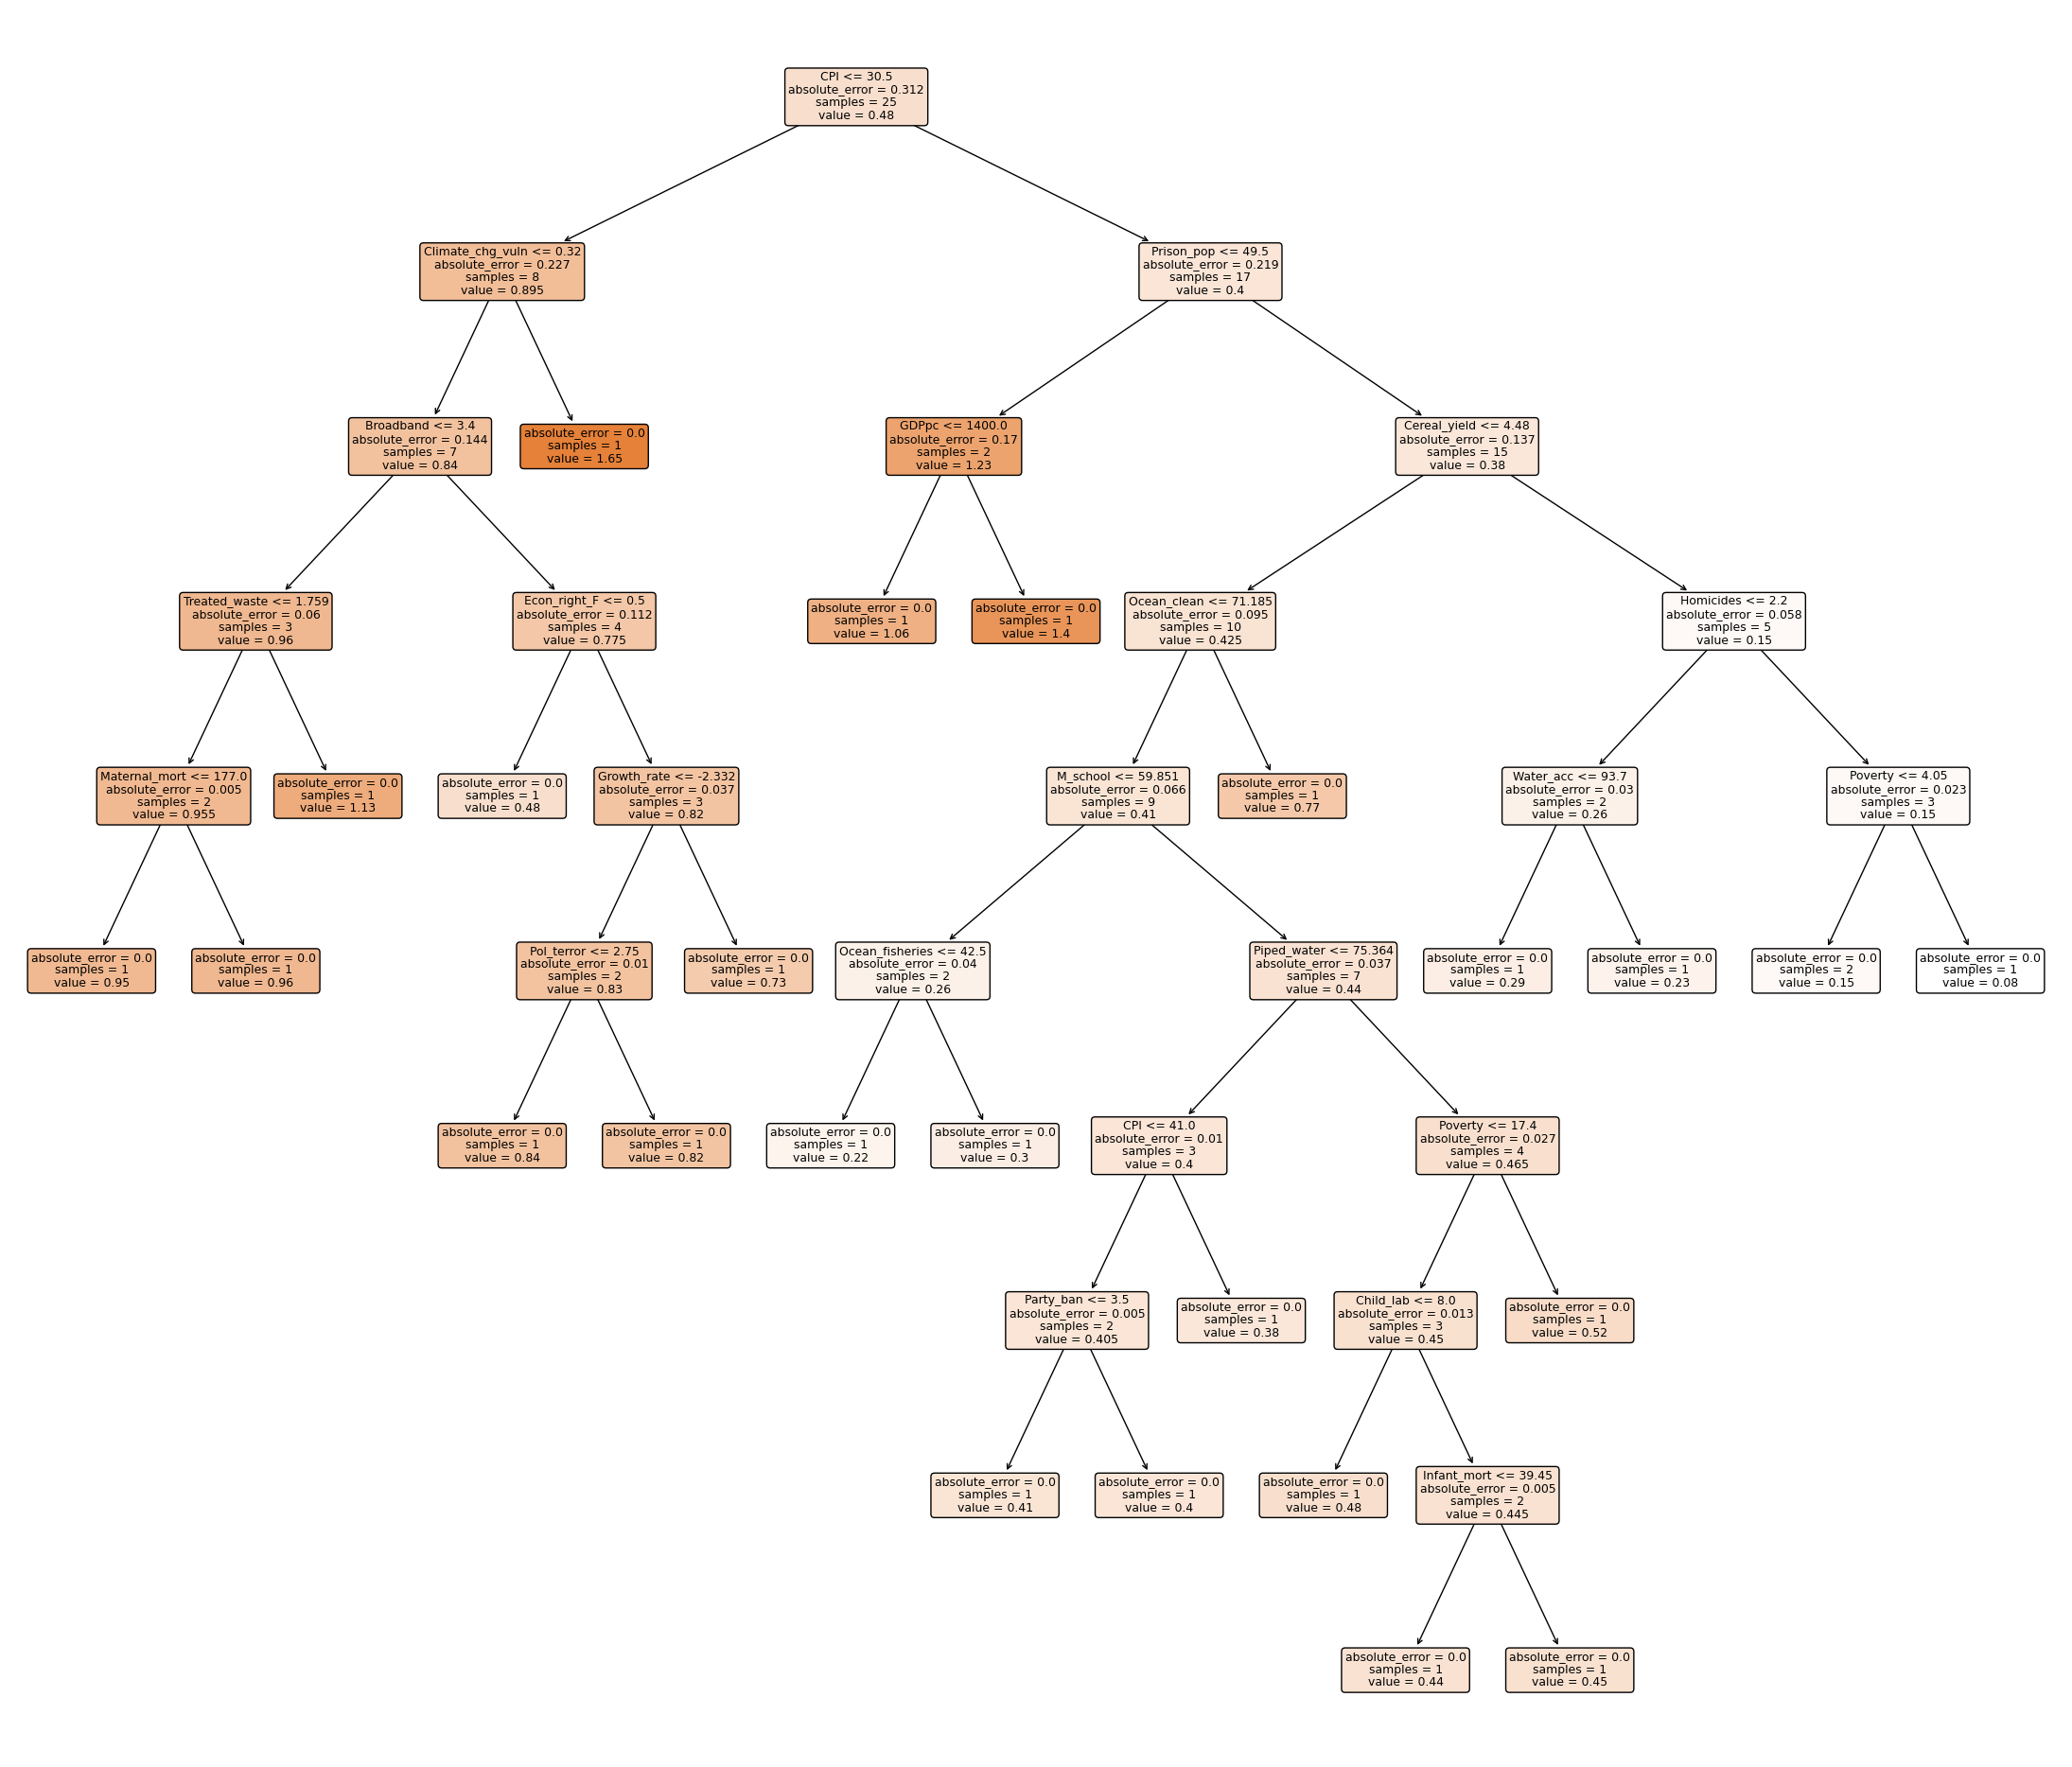

In [19]:
import matplotlib.pyplot as plt 
from sklearn import tree 

# We plot our decision tree:
fig = plt.figure(figsize=(28,24))
tree.plot_tree(model_2016_DT, filled=True, rounded=True,
               feature_names = X_training_2016.columns)
plt.show()

We can see that the  variables that were kept by the decision tree that  was created for 2016 are the following:
CPI, FDI, Climate_chg_vuln, Sanitation, Sanitation, F_parliam,  Poverty, KOF_Globalis, M_school, Ocean_clean, Forest_change,
Cereal_yield, M_school, Tuberculosis, Fuel_acc, CPI, Regist_birth, Co2_fuel, Child_lab, ATMs, Co2_fuel, Broadband, Undernourish.

The most important variables can be found at the root of the tree. In this case the most important variable is CPI.

Finally we found an Mean Average Error about 0.36. This shows the predictive capability of our model which can be described as mediocre.

#### With 2018 data

In [20]:
from sklearn import tree
model = tree.DecisionTreeRegressor(criterion='squared_error', splitter='best')

# We split the data:
X_training_2018 = training_2018.drop('SLAVERY', axis=1)
y_training_2018 = training_2018['SLAVERY']

X_test_2018 =  test_data_2018.drop('SLAVERY', axis=1)
y_test_2018 = test_data_2018['SLAVERY']

# We create the model according to the training data for 2016
model_2018_DT = model.fit(X_training_2018,y_training_2018)

# We make a prediction:
y_pred_2018_DT = model_2018_DT.predict(X_test_2018)

# Finally we calculate the MAE for the test data:
mae_2018_DT = mean_absolute_error(y_test_2018, y_pred_2018_DT)
mae_2018_DT

0.39284883720930236

In [21]:
# We find the variables that were used by the decision Tree for 2016 data: 
feature_names = model_2018_DT.feature_names_in_
used_feature_names = [feature_names[i] for i in model_2018_DT.tree_.feature if i != -2]
used_feature_names


['Neonatal_mort',
 'Water_acc',
 'Rape_compl',
 'Primary_school',
 'FDI',
 'Rape_prev',
 'Climate_chg_vuln',
 'Climate_chg_vuln',
 'Pol_terror',
 'Free_discuss',
 'Tuberculosis',
 'Growth_rate',
 'FDI',
 'F_school',
 'Sanitation',
 'Prison_pop',
 'Sexwrk_condom',
 'Sanitation',
 'Sexwrk_Syphilis',
 'Primary_school',
 'Piped_water',
 'Primary_school',
 'Forest_change',
 'AIDS_death',
 'Maternal_mort',
 'Fish_overexploit',
 'Gov_efficien',
 'F_school',
 'Fish_overexploit',
 'Cereal_yield',
 'Poverty',
 'Terrestrial_protect',
 'F_parliam',
 'Freshwater',
 'Unemploy',
 'Sexwrk_size',
 'Co2_fuel',
 'Inequality',
 'Undernourish',
 'Rape_prev',
 'Sexwrk_condom']

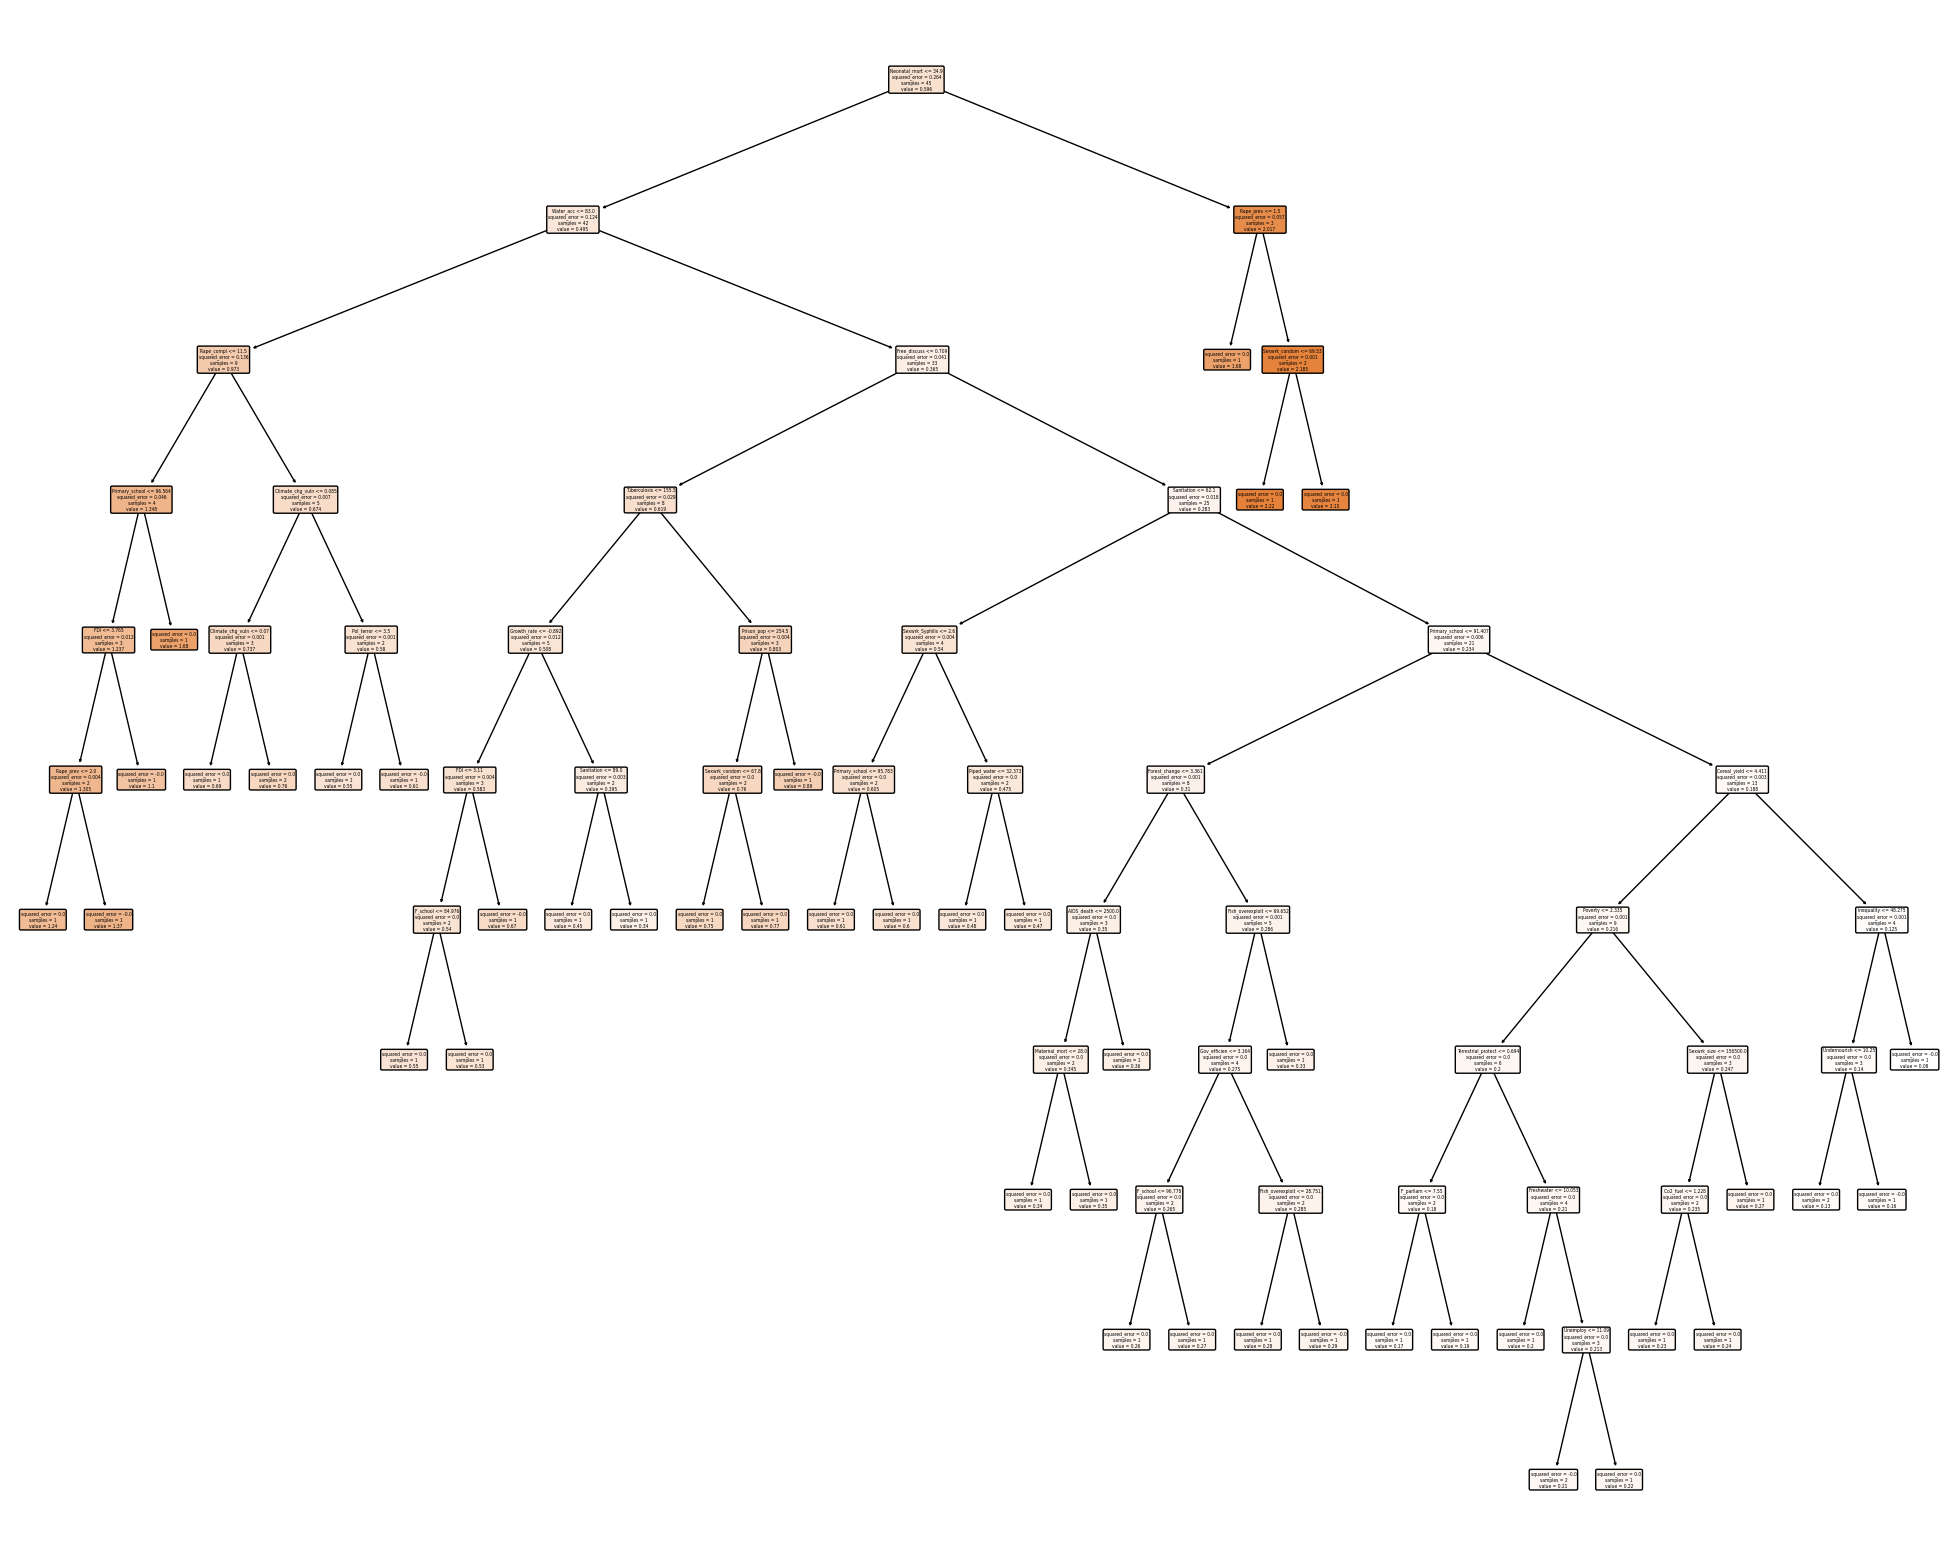

In [22]:
import matplotlib.pyplot as plt 
from sklearn import tree 

# We plot our decision tree:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_2018_DT, filled=True, rounded=True,
               feature_names = X_training_2018.columns)
plt.show()

We can see that the  variables that were kept by the decision tree that  was created for 2018 are the following:
Neonatal_mort, Water_acc, Sexwrk_HIV, CPI, Internet_use, Rape_prev, KOF_Globalis, Battle_deaths, Free_discuss, Tuberculosis, Unemploy, Prison_pop, Masskill_ever, ATMs, Sanitation, Pol_cand_restr, Stunting_u5s, Ocean_protect, AIDS_Orph, Primary_school, Forest_change, Sexwrk_Syphilis, Infant_mort, Climate_chg_vuln, Infant_vaccines, Literacy_15_24yrs, Rape_compl, Cereal_yield, Child_lab, Freemv_F, Democ, Maternal_mort, Property_rights, Poverty, Regist_birth.

The most important variables can be found at the root of the tree. In this case the most important variable is Neonatal_mort.

Finally we found an Mean Average Error about 0.38 . This shows the predictive capability of our model which can be described as mediocre.

### Final part, Random Forest

#### With 2016 data

In [23]:
from sklearn.ensemble import RandomForestRegressor

# We split the data:
X_training_2016 = training_2016.drop('SLAVERY', axis=1)
y_training_2016 = training_2016['SLAVERY']

X_test_2016 =  test_data_2016.drop('SLAVERY', axis=1)
y_test_2016 = test_data_2016['SLAVERY']

# we create the model:
regressor = RandomForestRegressor()
model_2016_RF = regressor.fit(X_training_2016,y_training_2016)

# We make a prediction:
y_pred_2016_DT = model_2016_RF.predict(X_test_2016)

# Finally we calculate the MAE for the test data:
mae_2016_DT = mean_absolute_error(y_test_2016, y_pred_2016_DT)
mae_2016_DT

0.30036701570680613

The mean average error for the random for 2016 is about 0.3. This indicates a model that it could be used for predictions but we have to take into account the error.

#### With 2018 data

In [24]:
from sklearn.ensemble import RandomForestRegressor

# We split the data:
X_training_2018 = training_2018.drop('SLAVERY', axis=1)
y_training_2018 = training_2018['SLAVERY']

X_test_2018 =  test_data_2018.drop('SLAVERY', axis=1)
y_test_2018 = test_data_2018['SLAVERY']


# we create the model:
regressor = RandomForestRegressor()
model_2018_RF = regressor.fit(X_training_2018,y_training_2018)

# We make a prediction:
y_pred_2018_DT = model_2018_RF.predict(X_test_2018)

# Finally we calculate the MAE for the test data:
mae_2018_DT = mean_absolute_error(y_test_2018, y_pred_2018_DT)
mae_2018_DT

0.337586046511628

The mean average error for the random forest for 2018 is about 0.35. This indicates not a very mediocer model. It could be used for predictions but we have some error. 

# Q3: Slavery Estimation with Theory-based Features


* Firstly we  will create the models for the 2016
* Later we will create the models for the 2018

In [25]:
# for the 2016 data:
training_2016_35 = training_imputed[training_imputed['Data_year'] == 2016]
training_2016_35 = training_2016_35[['SLAVERY','GDPpc_2016','AIDS_Orph_2016','Phys_secF_2014','Rape_enclave_2015','Rape_report_2015','Gender_equal_2015',
                 'Internet_use','Minority_rule','Maternal_mort','Broadband','ATMs','CPI',
                 'Stunting_u5s','F_school','Free_discuss','KOF_Globalis','Armedcon',
                 'Poverty','Sexwrk_condom','Neonatal_mort','Literacy_15_24yrs','Trade_open',
                 'Sexwrk_Syphilis','Democ','Soc_powerdist','Freemv_M',
                 'Freemv_F','Climate_chg_vuln','Undernourish','Work_rightCIRI','Infrastruct','Unemploy',
                 'Child_lab','Wasting_u5s']]


test_data_2016_35 = test_data[test_data['Data_year'] == 2016]
test_data_2016_35 = test_data_2016_35[['SLAVERY','GDPpc','AIDS_Orph','Phys_secF','Rape_enclave','Rape_report','Gender_equal',
           'Internet_use','Minority_rule','Maternal_mort','Broadband','ATMs','CPI',
            'Stunting_u5s','F_school','Free_discuss','KOF_Globalis','Armedcon',
            'Poverty','Sexwrk_condom','Neonatal_mort','Literacy_15_24yrs','Trade_open',
            'Sexwrk_Syphilis','Democ','Soc_powerdist','Freemv_M',
            'Freemv_F','Climate_chg_vuln','Undernourish','Work_rightCIRI','Infrastruct','Unemploy',
            'Child_lab','Wasting_u5s']]

In [26]:
# We rename the columns that contain year:
training_2016_35.columns = training_2016_35.columns.str.replace(r'_2016', '')
training_2016_35.columns = training_2016_35.columns.str.replace(r'_2014', '')
training_2016_35.columns = training_2016_35.columns.str.replace(r'_2015', '')

In [27]:
# Now we have to normalize the two data frames:
# we tranform the data frames:
training_2016_35_scalled = scaler.fit_transform(training_2016_35)
test_data_2016_35_scalled = scaler.fit_transform(test_data_2016_35)

# We conert the array back to pandas data frame
training_2016_35_scalled = pd.DataFrame(training_2016_35_scalled, columns=training_2016_35.columns)
test_data_2016_35_scalled = pd.DataFrame(test_data_2016_35_scalled, columns=test_data_2016_35.columns)

### Linear Regression for 2016

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# We split the data:
X_training_35_scaled_2016 = training_2016_35_scalled.drop('SLAVERY', axis=1)
y_training_35_scaled_2016 = training_2016_35_scalled['SLAVERY']

X_testing_35_scaled_2016 =  test_data_2016_35_scalled.drop('SLAVERY', axis=1)
y_testing_35_scaled_2016 = test_data_2016_35_scalled['SLAVERY']

# We create a lasso object:
lasso = Lasso(alpha=0.4)

# we fit lasso to the training data:
lasso_35= lasso.fit(X_training_35_scaled_2016, y_training_35_scaled_2016)

# Finally we make a prediction:
y_pred_35_regression = lasso_35.predict(X_testing_35_scaled_2016)

# Finally we calculate the MAE for the test data:
mae_35_regression = mean_absolute_error(y_testing_35_scaled_2016, y_pred_35_regression)
mae_35_regression

0.344237929467867

In [29]:
# Lets see which variables have been kept by lasso:
coef = pd.Series(lasso_35.coef_, index = X_training_35_scaled_2016.columns)
coef[coef != 0].sort_values() 

Free_discuss       -0.128858
Internet_use       -0.047725
F_school           -0.012306
Phys_secF           0.005673
Climate_chg_vuln    0.060054
dtype: float64

For the theorytical features for the year 2016 the following variables have been kept by the lasso regression:
Free_discuss, Internet_use, F_school, Phys_secF, Climate_chg_vuln.

We find a negative impact in the SLAVERY for the following variables: Free_discuss, Internet_use, F_school.

On the other hand, we find only two variables having a positive impact on the SLAVERY, the Phys_secF and Climate_chg_vuln.

Finally, by using the theorytical features we have a better Mean Average Error, 0.34 in comparison to the lasso models that were created for Q2. With that being said, for the lasso regression it is better to use only the theorytical features to make predictions.

### Desicion Tree for 2016

In [30]:
from sklearn import tree
model = tree.DecisionTreeRegressor()

# We split the data:
X_training_35_scaled_2016 = training_2016_35_scalled.drop('SLAVERY', axis=1)
y_training_35_scaled_2016 = training_2016_35_scalled['SLAVERY']

X_testing_35_scaled_2016 =  test_data_2016_35_scalled.drop('SLAVERY', axis=1)
y_testing_35_scaled_2016 = test_data_2016_35_scalled['SLAVERY']

# We create the model according to the training data for 2016
model_35_DT=model.fit(X_training_35_scaled_2016,y_training_35_scaled_2016)

# We make a prediction:
y_pred_35_DT = model_35_DT.predict(X_testing_35_scaled_2016)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_testing_35_scaled_2016, y_pred_35_DT)
mae_35_DT

0.5290932197091741

In [31]:
# We find the variables that were used by the decision Tree for 2016 data: 
feature_names = model_35_DT.feature_names_in_
used_feature_names = [feature_names[i] for i in model_35_DT.tree_.feature if i != -2]
used_feature_names

['GDPpc',
 'AIDS_Orph',
 'Sexwrk_condom',
 'Literacy_15_24yrs',
 'Child_lab',
 'Armedcon',
 'Free_discuss',
 'Minority_rule',
 'GDPpc',
 'CPI',
 'Neonatal_mort',
 'Child_lab',
 'Unemploy',
 'Neonatal_mort',
 'Child_lab',
 'Child_lab',
 'Sexwrk_condom',
 'Poverty',
 'Climate_chg_vuln',
 'Wasting_u5s',
 'ATMs',
 'KOF_Globalis',
 'Poverty']

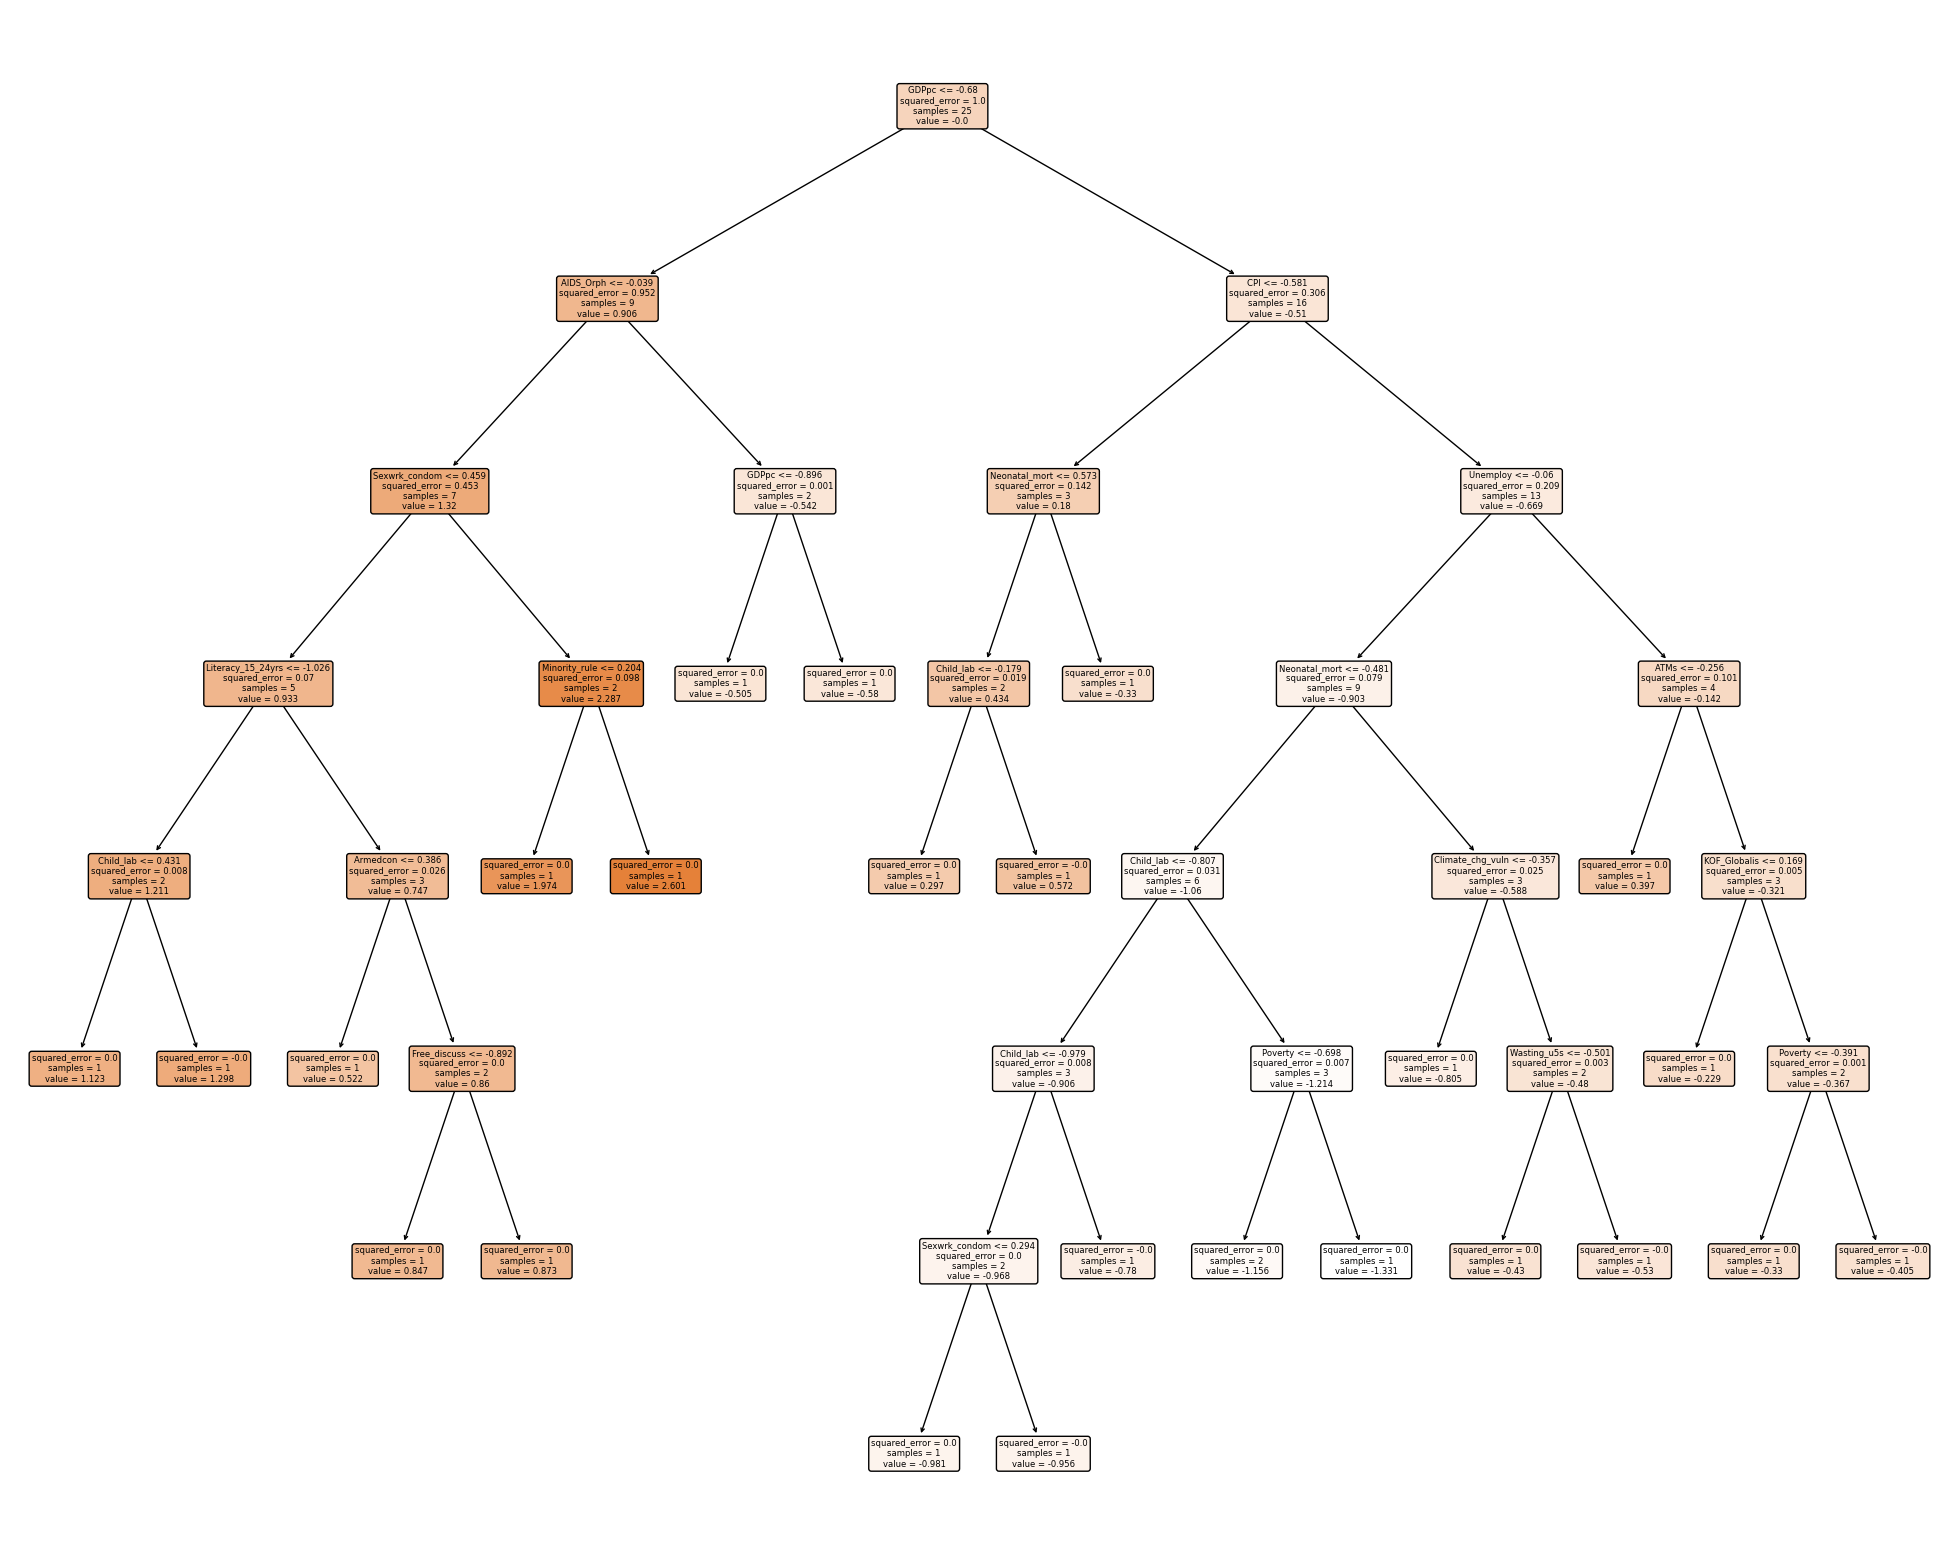

In [32]:
import matplotlib.pyplot as plt 
from sklearn import tree 

# We plot our decision tree:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_35_DT, filled=True, rounded=True,
               feature_names = X_training_35_scaled_2016.columns)
plt.show()

The most important variable for the Decision Tree for the 2016 data is the GDPc. The mean average error is, on average, 0.63. This indicates the poor prediction power of our model. 

### Random Forest for 2016

In [33]:
from sklearn.ensemble import RandomForestRegressor

# We split the data:
X_training_35_scaled_2016 = training_2016_35_scalled.drop('SLAVERY', axis=1)
y_training_35_scaled_2016 = training_2016_35_scalled['SLAVERY']

X_testing_35_scaled_2016 =  test_data_2016_35_scalled.drop('SLAVERY', axis=1)
y_testing_35_scaled_2016 = test_data_2016_35_scalled['SLAVERY']

# we create the model:
regressor = RandomForestRegressor()
model_35_RF = regressor.fit(X_training_35_scaled_2016,y_training_35_scaled_2016)

# We make a prediction:
y_pred_35_RF = model_35_RF.predict(X_testing_35_scaled_2016)

# Finally we calculate the MAE for the test data:
mae_35_RF = mean_absolute_error(y_testing_35_scaled_2016, y_pred_35_RF)
mae_35_RF

0.43108997312622166

On average the mean average error for the random forest is 0.42. The predictive power of the model is not good and it should not be used for predictions. 

Overall for the data of 2016 the lasso regression gives us the better predictions with a mae of 0.34

### We first make the relative changes to the data frame:

In [34]:
# for the 2018 data:
training_2018_35 = training_imputed[training_imputed['Data_year'] == 2018]
training_2018_35 = training_2018_35[['SLAVERY','GDPpc_2016','AIDS_Orph_2018','Phys_secF_2019','Rape_enclave_2015','Rape_report_2015','Gender_equal_2015',
                 'Internet_use','Minority_rule','Maternal_mort','Broadband','ATMs','CPI',
                 'Stunting_u5s','F_school','Free_discuss','KOF_Globalis','Armedcon',
                 'Poverty','Sexwrk_condom','Neonatal_mort','Literacy_15_24yrs','Trade_open',
                 'Sexwrk_Syphilis','Democ','Soc_powerdist','Freemv_M',
                 'Freemv_F','Climate_chg_vuln','Undernourish','Work_rightCIRI','Infrastruct','Unemploy',
                 'Child_lab','Wasting_u5s']]

test_data_2018_35 = test_data[test_data['Data_year'] == 2018]
test_data_2018_35 = test_data_2018_35[['SLAVERY','GDPpc','AIDS_Orph','Phys_secF','Rape_enclave','Rape_report','Gender_equal',
           'Internet_use','Minority_rule','Maternal_mort','Broadband','ATMs','CPI',
            'Stunting_u5s','F_school','Free_discuss','KOF_Globalis','Armedcon',
            'Poverty','Sexwrk_condom','Neonatal_mort','Literacy_15_24yrs','Trade_open',
            'Sexwrk_Syphilis','Democ','Soc_powerdist','Freemv_M',
            'Freemv_F','Climate_chg_vuln','Undernourish','Work_rightCIRI','Infrastruct','Unemploy',
            'Child_lab','Wasting_u5s']]

In [35]:
# We rename the columns that contain year:
training_2018_35.columns = training_2018_35.columns.str.replace(r'_2019', '')
training_2018_35.columns = training_2018_35.columns.str.replace(r'_2018', '')
training_2018_35.columns = training_2018_35.columns.str.replace(r'_2016', '')
training_2018_35.columns = training_2018_35.columns.str.replace(r'_2014', '')
training_2018_35.columns = training_2018_35.columns.str.replace(r'_2015', '')

In [36]:
# Now we have to normalize the two data frames:
# we tranform the data frames:
training_2018_35_scalled = scaler.fit_transform(training_2018_35)
test_data_2018_35_scalled = scaler.fit_transform(test_data_2018_35)

# We conert the array back to pandas data frame
training_2018_35_scalled = pd.DataFrame(training_2018_35_scalled, columns=training_2018_35.columns)
test_data_2018_35_scalled = pd.DataFrame(test_data_2018_35_scalled, columns=test_data_2018_35.columns)

### Linear Regression for 2018

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# We split the data:
X_training_35_scaled_2018 = training_2018_35_scalled.drop('SLAVERY', axis=1)
y_training_35_scaled_2018 = training_2018_35_scalled['SLAVERY']

X_testing_35_scaled_2018 =  test_data_2018_35_scalled.drop('SLAVERY', axis=1)
y_testing_35_scaled_2018 = test_data_2018_35_scalled['SLAVERY']

# We create a lasso object:
lasso = Lasso(alpha=0.5)

# we fit lasso to the training data:
lasso_35= lasso.fit(X_training_35_scaled_2018, y_training_35_scaled_2018)

# Finally we make a prediction:
y_pred_35_regression = lasso_35.predict(X_testing_35_scaled_2018)

# Finally we calculate the MAE for the test data:
mae_35_regression = mean_absolute_error(y_testing_35_scaled_2018, y_pred_35_regression)
mae_35_regression

0.35951947772751863

In [38]:
# Lets see which variables have been kept by lasso:
coef = pd.Series(lasso_35.coef_, index = X_training_35_scaled_2018.columns)
coef[coef != 0].sort_values()

Literacy_15_24yrs   -0.091256
Neonatal_mort        0.120670
dtype: float64

For the theorytical features for the year 2018 the following variables have been kept by the lasso regression: Literacy_15_24yrs, Neonatal_mort.

The Literacy_15_24yrs has a negative efect on slavery.On the other hand, On the other hand, has a positive effect on slavery.


Finally, by using the theorytical features we have a better Mean Average Error, 0.35 in comparison to the lasso models that were created for Q2. With that being said, for the lasso regression it is better to use only the theorytical features to make predictions.

### Desicion Tree for 2018

In [39]:
from sklearn import tree
model = tree.DecisionTreeRegressor()

# We split the data:
X_training_35_scaled_2018 = training_2018_35_scalled.drop('SLAVERY', axis=1)
y_training_35_scaled_2018 = training_2018_35_scalled['SLAVERY']

X_testing_35_scaled_2018 =  test_data_2018_35_scalled.drop('SLAVERY', axis=1)
y_testing_35_scaled_2018 = test_data_2018_35_scalled['SLAVERY']

# We create the model according to the training data for 2016
model_35_DT=model.fit(X_training_35_scaled_2018,y_training_35_scaled_2018)

# We make a prediction:
y_pred_35_DT = model_35_DT.predict(X_testing_35_scaled_2018)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_testing_35_scaled_2018, y_pred_35_DT)
mae_35_DT

0.6487727132434928

In [40]:
# We find the variables that were used by the decision Tree for 2016 data: 
feature_names = model_35_DT.feature_names_in_
used_feature_names = [feature_names[i] for i in model_35_DT.tree_.feature if i != -2]
used_feature_names

['Neonatal_mort',
 'Internet_use',
 'CPI',
 'Phys_secF',
 'Child_lab',
 'Child_lab',
 'F_school',
 'Free_discuss',
 'Wasting_u5s',
 'GDPpc',
 'Undernourish',
 'Climate_chg_vuln',
 'CPI',
 'Sexwrk_Syphilis',
 'Freemv_M',
 'Undernourish',
 'Armedcon',
 'AIDS_Orph',
 'Infrastruct',
 'Stunting_u5s',
 'AIDS_Orph',
 'Climate_chg_vuln',
 'Free_discuss',
 'Maternal_mort',
 'Undernourish',
 'Free_discuss',
 'Free_discuss',
 'Maternal_mort',
 'Child_lab',
 'Literacy_15_24yrs',
 'Undernourish',
 'Wasting_u5s',
 'Trade_open',
 'Poverty',
 'Internet_use',
 'Trade_open',
 'ATMs',
 'ATMs',
 'Literacy_15_24yrs',
 'Child_lab',
 'Sexwrk_condom',
 'Neonatal_mort']

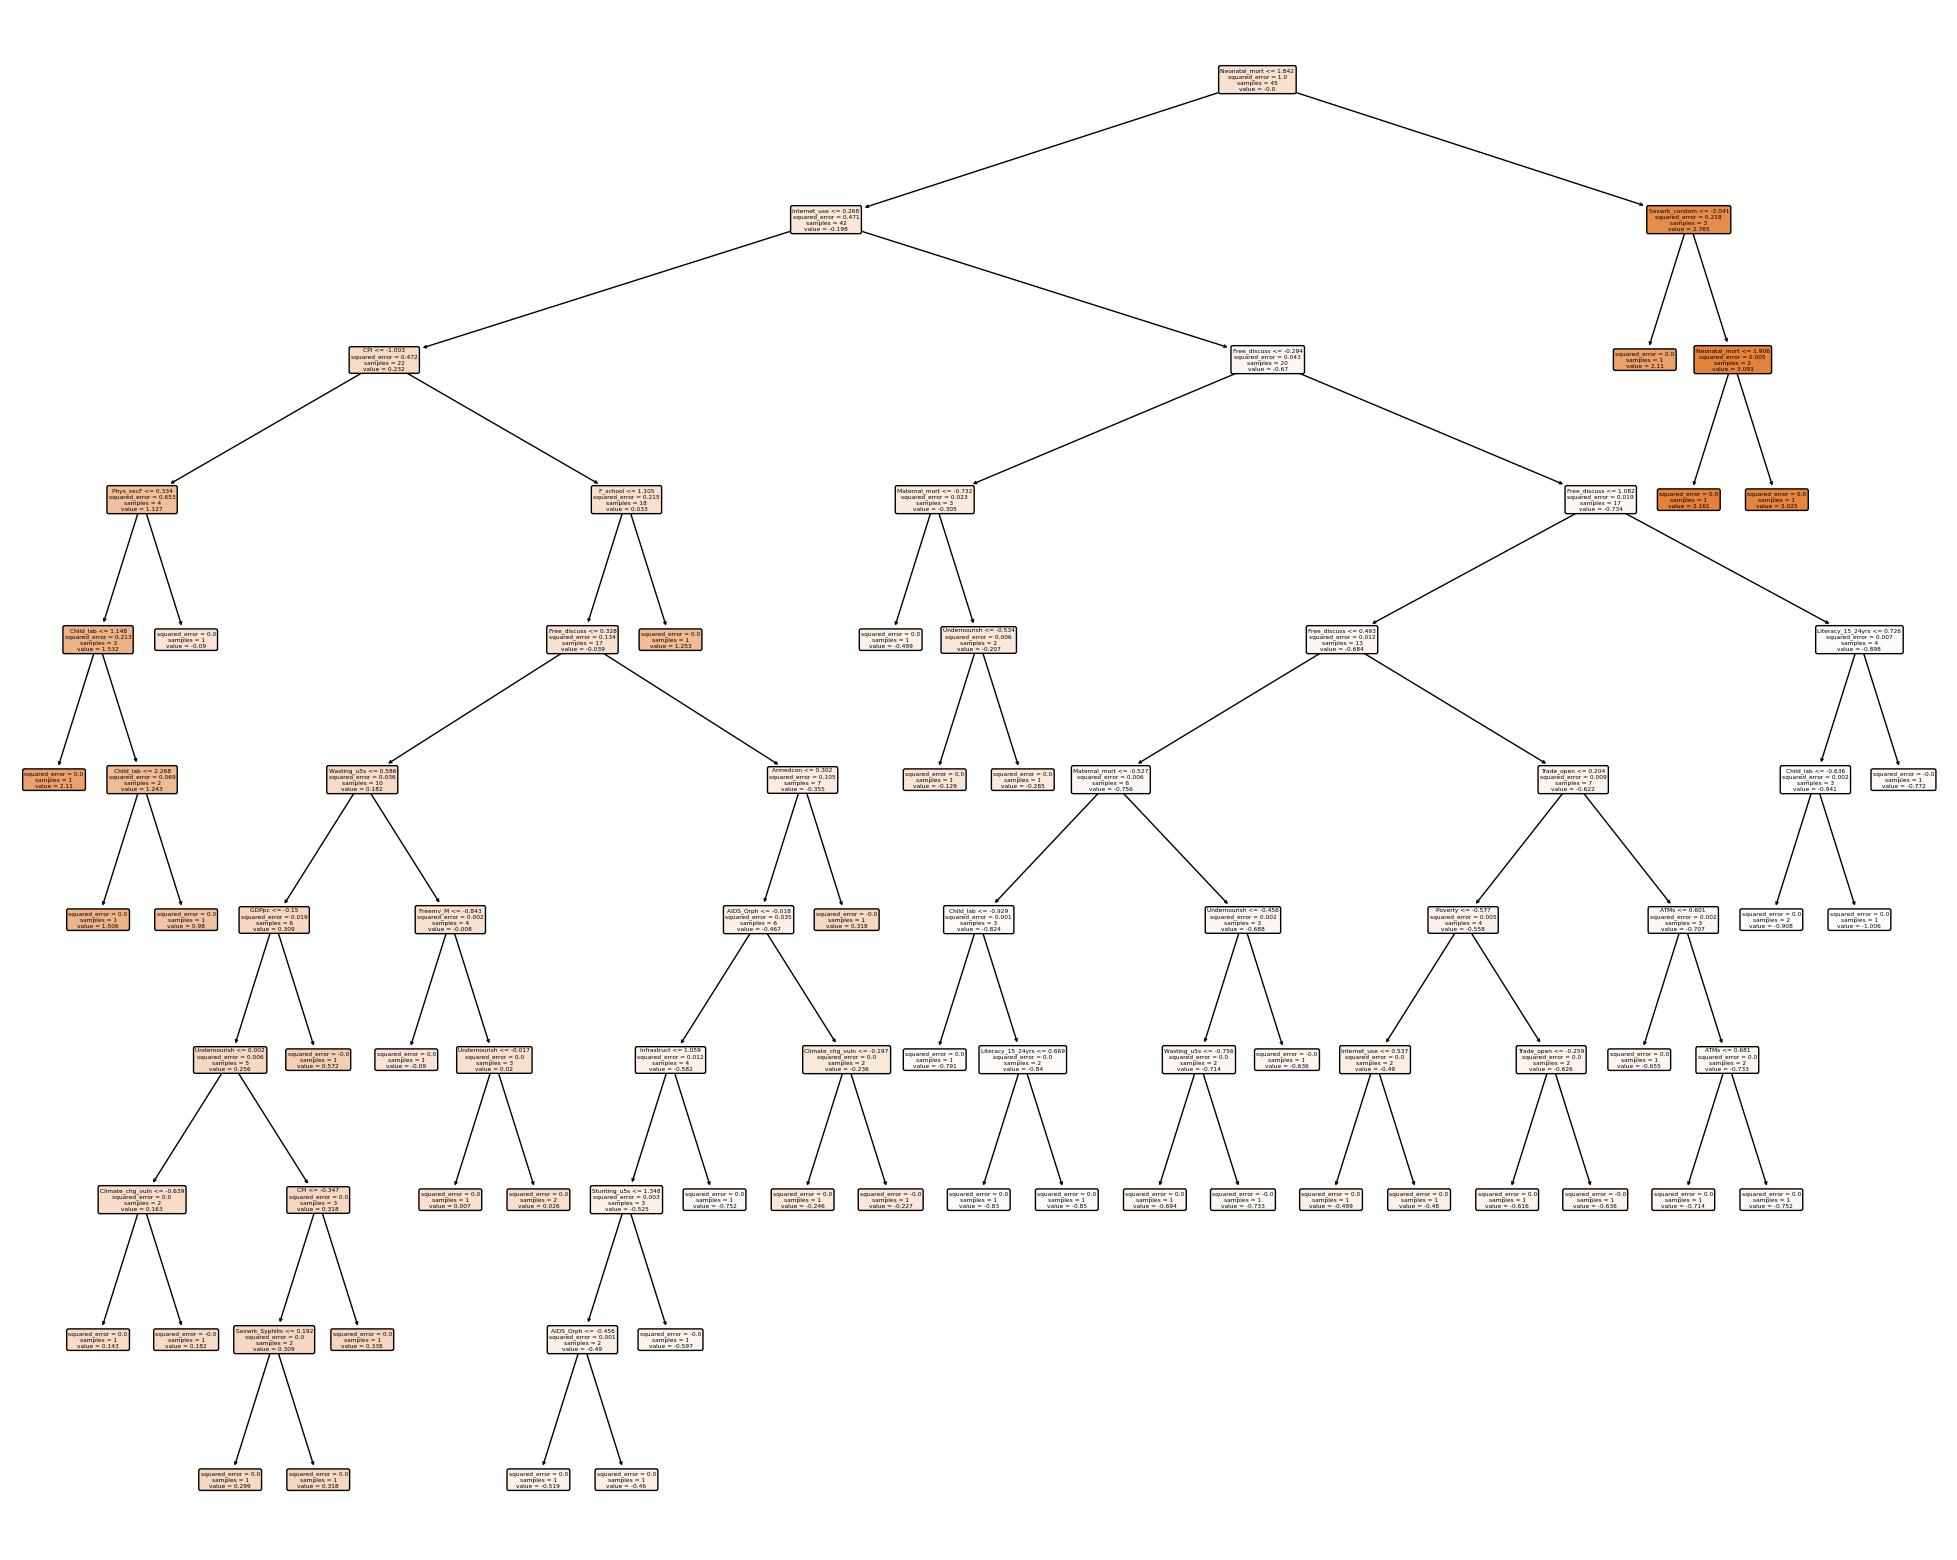

In [41]:
import matplotlib.pyplot as plt 
from sklearn import tree 

# We plot our decision tree:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_35_DT, filled=True, rounded=True,
               feature_names = X_training_35_scaled_2018.columns)
plt.show()

The most important variable for the Decision Tree for the 2018 data is the Maternal_mort. The mean average error is, on average, 0.70. This indicates the poor prediction power of our model. 

### Random Forest for 2018

In [42]:
from sklearn.ensemble import RandomForestRegressor

# We split the data:
X_training_35_scaled_2018 = training_2018_35_scalled.drop('SLAVERY', axis=1)
y_training_35_scaled_2018 = training_2018_35_scalled['SLAVERY']

X_testing_35_scaled_2018 =  test_data_2018_35_scalled.drop('SLAVERY', axis=1)
y_testing_35_scaled_2018 = test_data_2018_35_scalled['SLAVERY']

# we create the model:
regressor = RandomForestRegressor()
model_35_RF = regressor.fit(X_training_35_scaled_2018,y_training_35_scaled_2018)

# We make a prediction:
y_pred_35_RF = model_35_RF.predict(X_testing_35_scaled_2018)

# Finally we calculate the MAE for the test data:
mae_35_RF = mean_absolute_error(y_testing_35_scaled_2018, y_pred_35_RF)
mae_35_RF

0.4828482209627685

On average the mean average error for the random forest is 0.48. The predictive power of the model is not good and it should not be used for predictions. 

Overall for the data of 2018 the lasso regression gives us the better predictions with a mae of 0.35.

# Q4: Slavery Estimation with PCA-derived Features


## Linear Regression for 2016 Data:

In [43]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# We split the data:
X_training_2016 = training_2016.drop('SLAVERY', axis=1)
y_training_2016 = training_2016['SLAVERY']

X_test_2016 =  test_data_2016.drop('SLAVERY', axis=1)
y_test_2016 = test_data_2016['SLAVERY']

# Create a pipeline with PCA and Lasso Regression
pipeline = Pipeline([
    ('scale', StandardScaler()), # Scale the data
    ('pca', PCA(n_components=6)), # Perform PCA and keep the top 3 principal components
    ('lasso', Lasso(alpha=0.1)) # Use Lasso Regression with alpha=0.1
])

# Fit the pipeline on the training data
pipeline.fit(X_training_2016, y_training_2016)

# Evaluate the pipeline on the testing data
prediction_lasso = pipeline.predict(X_test_2016)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_test_2016, prediction_lasso)
mae_35_DT

0.25736676889762916

## Linear Regression for 2018 Data:

In [44]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# We split the data:
X_training_2018 = training_2018.drop('SLAVERY', axis=1)
y_training_2018 = training_2018['SLAVERY']

X_test_2018 =  test_data_2018.drop('SLAVERY', axis=1)
y_test_2018 = test_data_2018['SLAVERY']

# We create a pipeline. First we normalize the data, then we use PCA and finally lasso
pipeline = Pipeline([
    ('scale', StandardScaler()), 
    ('pca', PCA(n_components=6)),
    ('lasso', Lasso(alpha=0.1)) 
])

# We fit the model 
pipeline.fit(X_training_2018, y_training_2018)

# We make a prediction
prediction_lasso = pipeline.predict(X_test_2018)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_test_2018, prediction_lasso)
mae_35_DT

0.35790332508765194

Both mean average errors have good results. With the use of 2016 data we find a MAE of 0.27 and with the use of 2018 datat we find a MAE of 0.35.

## Decision Tree for 2016 data:

In [45]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# We split the data:
X_training_2016 = training_2016.drop('SLAVERY', axis=1)
y_training_2016 = training_2016['SLAVERY']

X_test_2016 =  test_data_2016.drop('SLAVERY', axis=1)
y_test_2016 = test_data_2016['SLAVERY']


# we create a pipeline. First we normalize. Secondly we make use of the PCA. Finally we create a decision tree
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=6)),
    ('dt', DecisionTreeRegressor())
])

# Fit the pipeline to your data
pipeline.fit(X_training_2016, y_training_2016)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test_2016)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_test_2016, y_pred)
mae_35_DT

0.4529319371727748

## Decision Tree for 2018 data:

In [46]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# We split the data:
X_training_2018 = training_2018.drop('SLAVERY', axis=1)
y_training_2018 = training_2018['SLAVERY']

X_test_2018 =  test_data_2018.drop('SLAVERY', axis=1)
y_test_2018 = test_data_2018['SLAVERY']


# we create a pipeline. First we normalize. Secondly we make use of the PCA. Finally we create a decision tree
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=6)),
    ('dt', DecisionTreeRegressor())
])

# Fit the pipeline to your data
pipeline.fit(X_training_2018, y_training_2018)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test_2018)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_test_2018, y_pred)
mae_35_DT

0.39581395348837206

Both decision trees have a decent mean average error. But the lasso regression has given us better results. 

## Random Forest for 2016

In [47]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# We split the data:
X_training_2016 = training_2016.drop('SLAVERY', axis=1)
y_training_2016 = training_2016['SLAVERY']

X_test_2016 =  test_data_2016.drop('SLAVERY', axis=1)
y_test_2016 = test_data_2016['SLAVERY']


# we create a pipeline. First we normalize. Secondly we make use of the PCA. Finally we create a random forest
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=6)),
    ('rf', RandomForestRegressor())
])

# Fit the pipeline to your data
pipeline.fit(X_training_2016, y_training_2016)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test_2016)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_test_2016, y_pred)
mae_35_DT

0.30731518324607326

## Random Forest for 2018

In [48]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# We split the data:
X_training_2018 = training_2018.drop('SLAVERY', axis=1)
y_training_2018 = training_2018['SLAVERY']

X_test_2018 =  test_data_2018.drop('SLAVERY', axis=1)
y_test_2018 = test_data_2018['SLAVERY']


# we create a pipeline. First we normalize. Secondly we make use of the PCA. Finally we create a random forest
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=6)),
    ('rf', RandomForestRegressor())
])

# Fit the pipeline to your data
pipeline.fit(X_training_2018, y_training_2018)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test_2018)

# Finally we calculate the MAE for the test data:
mae_35_DT = mean_absolute_error(y_test_2018, y_pred)
mae_35_DT

0.33228313953488375

Both models have good MAEs, about 0.33.

The best models are the lasso regression models and these should be used for prediction. The random forest is second with a mae, about, 0.33.